<a href="https://colab.research.google.com/github/Deepakchakra/Mini-project-audio-signal-classification-/blob/main/audio_1DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#Import the files to Google Colab
df = pd.read_csv('/content/drive/MyDrive/audio_data/dataset/Music Info.csv')

# Show 10 first Row
df.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [ ]:
# Check the Data Infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [ ]:
# Selecting the Feature, by remove the unused feature

feature = ['time_signature']
x = df.drop(feature, axis=1)
# Set The Target
y= df["time_signature"]


In [ ]:
# Split Data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle = False, test_size=0.25, random_state=23)

In [ ]:
# Define the model
model = Sequential([
    Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(13, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(6, activation='softmax') # Changed to 6 units to accommodate values 0-5
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 16)         │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 32)          │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,830 (14.96 KB)

 Trainable params: 3,830 (14.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Select only numeric columns for training
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

# Reshape data for CNN (samples, timesteps, features)
X_train_reshaped = X_train_numeric.values.reshape(X_train_numeric.shape[0], X_train_numeric.shape[1], 1)
X_test_reshaped = X_test_numeric.values.reshape(X_test_numeric.shape[0], X_test_numeric.shape[1], 1)

history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7104 - loss: 4815.8315 - val_accuracy: 0.9087 - val_loss: 131.2829
Epoch 2/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7933 - loss: 153.6497 - val_accuracy: 0.9071 - val_loss: 57.4313
Epoch 3/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7985 - loss: 104.6303 - val_accuracy: 0.9085 - val_loss: 44.3102
Epoch 4/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7992 - loss: 55.2876 - val_accuracy: 0.9079 - val_loss: 25.3410
Epoch 5/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8010 - loss: 31.4764 - val_accuracy: 0.9089 - val_loss: 25.2125
Epoch 6/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8063 - loss: 13.1334 - val_accuracy: 0.4489 - val_loss: 1.7025
Epoch 7/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8218 - loss: 2.0997 - val_accuracy: 0.9083 - val_loss: 0.3479
Epoch 8/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8813 - loss: 0

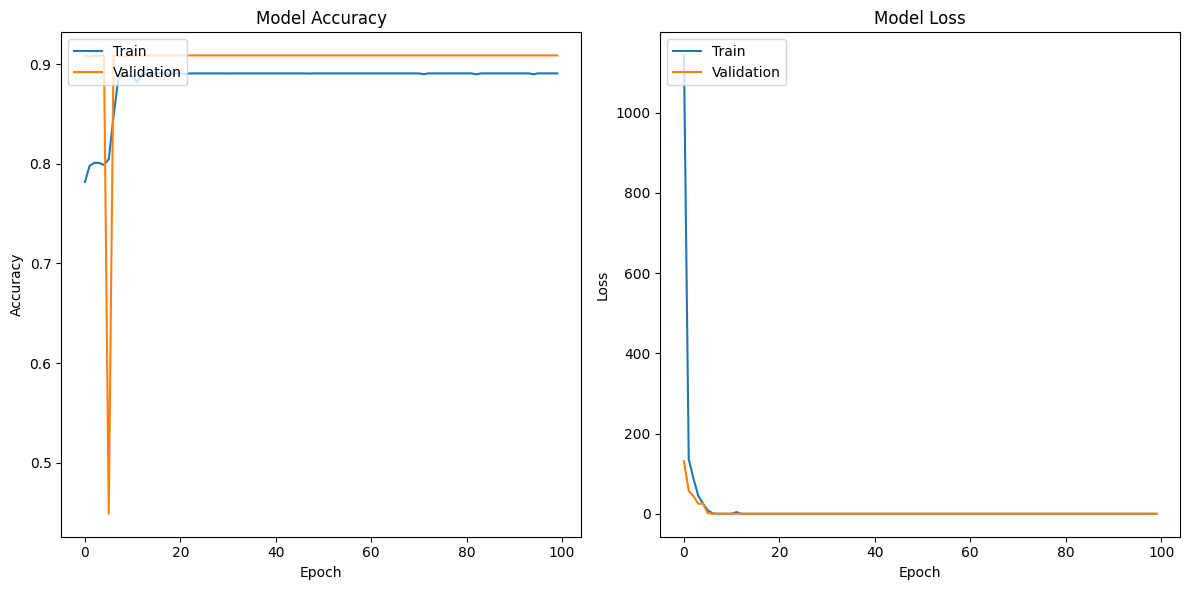

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:

# Generate some test data

# Predict on test data
predictions = model.predict(X_test_reshaped)

# Print predictions
print("Predictions:")
print(predictions)

# Evaluate the model on test data (if you have labels)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predictions:
[[1.4279304e-05 2.1537762e-02 1.6065476e-15 2.1335456e-01 7.4007934e-01
  2.5013959e-02]
 [5.0300908e-10 5.1232907e-03 1.6971089e-18 5.9598640e-02 9.3033779e-01
  4.9403645e-03]
 [1.8537331e-12 1.8832623e-03 3.8156529e-16 1.5890248e-02 9.7938067e-01
  2.8458375e-03]
 ...
 [2.1921653e-09 3.7838561e-03 3.3784372e-17 5.3502671e-02 9.3041092e-01
  1.2302524e-02]
 [7.9018840e-11 2.3632536e-03 2.9071742e-18 3.2069337e-02 9.5916867e-01
  6.3988436e-03]
 [1.7140367e-06 1.6115047e-02 5.1644800e-13 1.2289623e-01 8.3365577e-01
  2.7331220e-02]]
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8584 - loss: 0.4723
Test loss: 0.4444, Test accuracy: 0.8677


In [ ]:

pred = model.predict(X_test_reshaped)
pred_y = pred.argmax(axis=-1)

396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
import numpy as np
print(np.shape(pred_y))

(12671,)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[    0     0     0     3     0]
 [    0     0     0   153     0]
 [    0     0     0  1257     0]
 [    1     0     0 10995     0]
 [    0     0     0   262     0]]


In [ ]:
print(cm[:,3])

[    3   153  1257 10995   262]


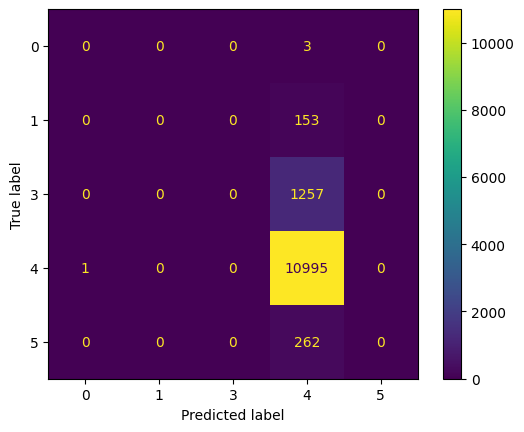

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_y)
#disp.plot()

In [ ]:
print(np.shape(y_test))
print(np.shape(pred_y))

(12671,)
(12671,)


In [ ]:
print(np.shape(y_test))

(12671,)


In [ ]:
from sklearn import metrics
# Show the Accuracy, Precision, Recall, F1, etc.
acc = metrics.accuracy_score(y_test, pred_y)
prec= metrics.precision_score(y_test, pred_y, average='weighted')
rec = metrics.recall_score(y_test, pred_y, average='weighted')
f1 = metrics.f1_score(y_test, pred_y, average='weighted')
kappa = metrics.cohen_kappa_score(y_test, pred_y)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print(kappa)

Accuracy: 0.8677294609738774
Precision: 0.7530823325073998
Recall: 0.8677294609738774
F1 Score: 0.8063511495705868
-7.902079019106445e-05


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00       153
           3       0.00      0.00      0.00      1257
           4       0.87      1.00      0.93     10996
           5       0.00      0.00      0.00       262

    accuracy                           0.87     12671
   macro avg       0.17      0.20      0.19     12671
weighted avg       0.75      0.87      0.81     12671



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


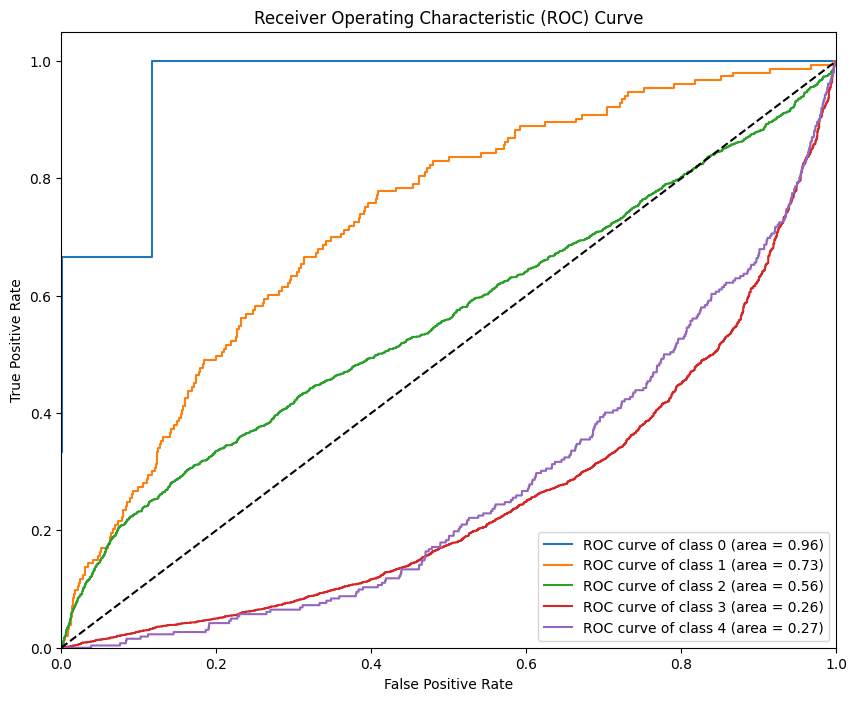

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 3, 4, 5])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00       153
           3       0.00      0.00      0.00      1257
           4       0.87      1.00      0.93     10996
           5       0.00      0.00      0.00       262

    accuracy                           0.87     12671
   macro avg       0.17      0.20      0.19     12671
weighted avg       0.75      0.87      0.81     12671



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
display(df['time_signature'].value_counts())

,count
time_signature,
4,44989
3,4501
5,732
1,451
0,10


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00       153
           3       0.00      0.00      0.00      1257
           4       0.87      1.00      0.93     10996
           5       0.00      0.00      0.00       262

    accuracy                           0.87     12671
   macro avg       0.17      0.20      0.19     12671
weighted avg       0.75      0.87      0.81     12671



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn import metrics
# Show the Accuracy, Precision, Recall, F1, etc.
acc = metrics.accuracy_score(y_test, pred_y)
prec= metrics.precision_score(y_test, pred_y, average='weighted')
rec = metrics.recall_score(y_test, pred_y, average='weighted')
f1 = metrics.f1_score(y_test, pred_y, average='weighted')
kappa = metrics.cohen_kappa_score(y_test, pred_y)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print(kappa)

Accuracy: 0.8677294609738774
Precision: 0.7530823325073998
Recall: 0.8677294609738774
F1 Score: 0.8063511495705868
-7.902079019106445e-05


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
